In [5]:
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

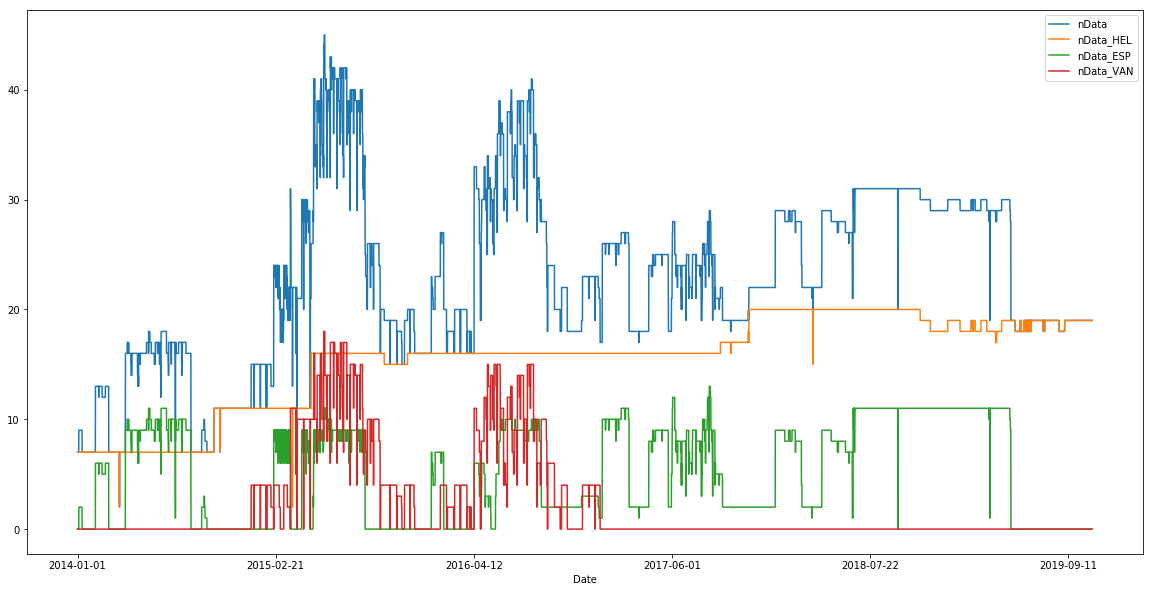

In [18]:
ALL_Bikers=pd.read_csv('All_bikers.csv')
ax=ALL_Bikers.plot(y="nData",x="Date", figsize=[20,10])
ALL_Bikers.plot(ax=ax,y='nData_HEL',x='Date')
ALL_Bikers.plot(ax=ax,y='nData_ESP',x='Date')
ALL_Bikers.plot(ax=ax,y='nData_VAN',x='Date')

plt.show()
cIndex_Vantaa=pd.Index(['Weekday', 'Asolanvayla P', 'Asolanvayla E', 'Hakunilantie P',
       'Hakunilantie E', 'Kyytitie I', 'Kyytitie L', 'Kaislaranta P',
       'Kaislaranta E', 'Kuusijarvi P', 'Kuusijarvi E', 'Kytopuisto P',
       'Kytöpuisto E', 'Pellas I', 'Pellas L', 'Simonkylantie P',
       'Simonkylantie E', 'Solkikuja I', 'Solkikuja L', 'Vanha Porvoontie P',
       'Vanha Porvoontie E', 'Vantaanlaaksontie P', 'Vantaanlaaksontie E',
       'Ylastontie I', 'Ylastontie L'],
      dtype='object')
